<a href="https://colab.research.google.com/github/codeantik/Self-Organizing-Maps/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=5d89ef10c8f553086b0477f1d0a935171ce6b1a03a5b7b162b95954a5f6e439a
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


### Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [ ]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show

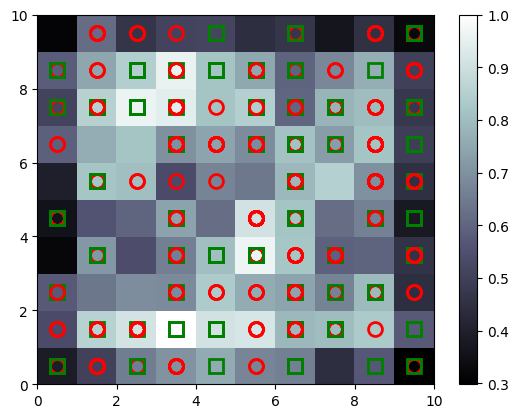

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, 
       w[1] + 0.5,
       markers[y[i]], 
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4, 2)], mappings[(6, 4)], mappings[(3, 8)], mappings[(4, 8)], mappings[(4, 9)]), axis = 0)

##Printing the Fraunch Clients

In [ ]:
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5599440e+07 1.0000000e+00 5.8580000e+01 2.7100000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.4150000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 3.2000000e+02 1.0000000e+00]
 [1.5591010e+07 1.0000000e+00 4.7830000e+01 4.1650000e+00 2.0000000e+00
  1.4000000e+01 5.0000000e+00 8.5000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 5.2000000e+02 1.0000000e+00]
 [1.5620832e+07 1.0000000e+00 3.7330000e+01 2.6650000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 5.0200000e+02]
 [1.5580914e+07 1.0000000e+00 5.2330000e+01 1.3750000e+00 1.0000000e+00
  8.0000000e+00 8.0000000e+00 9.4600000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.0000000e+02 1.0100000e+02]
 [1.5607986e+07 1.0000000e+00 4.0920000e+01 2.2500000e+00 1.0000000e+00
  1.4000000e+01 8.0000000e+00 1.0000000e+01 1.0000000e+00 0.